In [1]:
#%matplotlib inline
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib
from util_kw import *

In [2]:
path_models = './word2vec_models'

In [4]:
wvm = Word2Vec.load(path_models+'/'+'IN-indianexpress-india_with_phraser').wv

In [5]:
vocab = wvm.vocab
all_words = [x for x in vocab.keys()]

In [6]:
g1 = nx.Graph()
for word in lower_caste_keywords+upper_caste_keywords:
    if word in all_words:
        recurse_add_(word, wvm, g1, depth=2, topn=6)
    else:
        print ("Word "+word+" not found.")

In [7]:
matplotlib.rcParams['figure.figsize'] = (17, 12)

In [8]:
topics = [x for x in nx.connected_component_subgraphs(g1)]
print (len(topics))

8


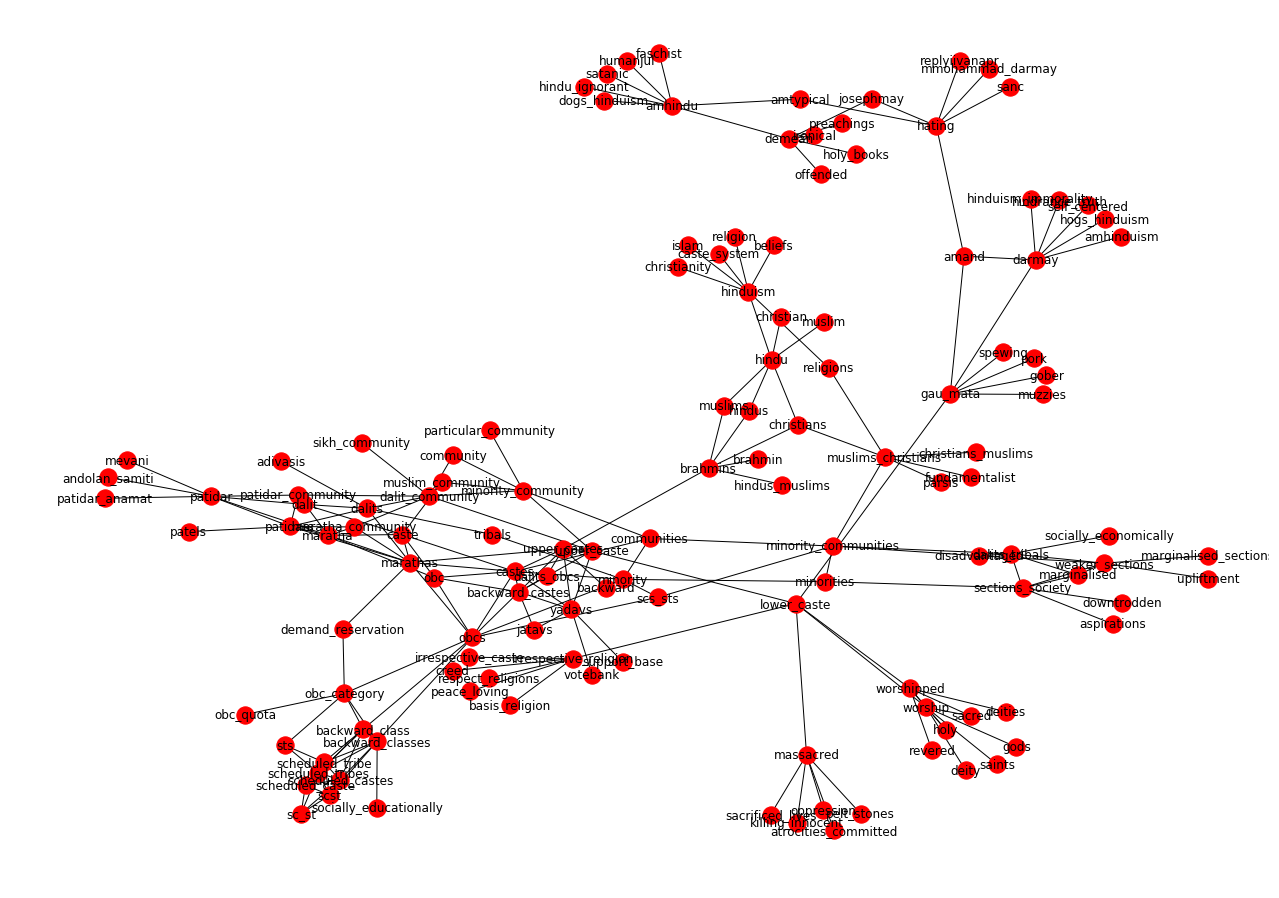

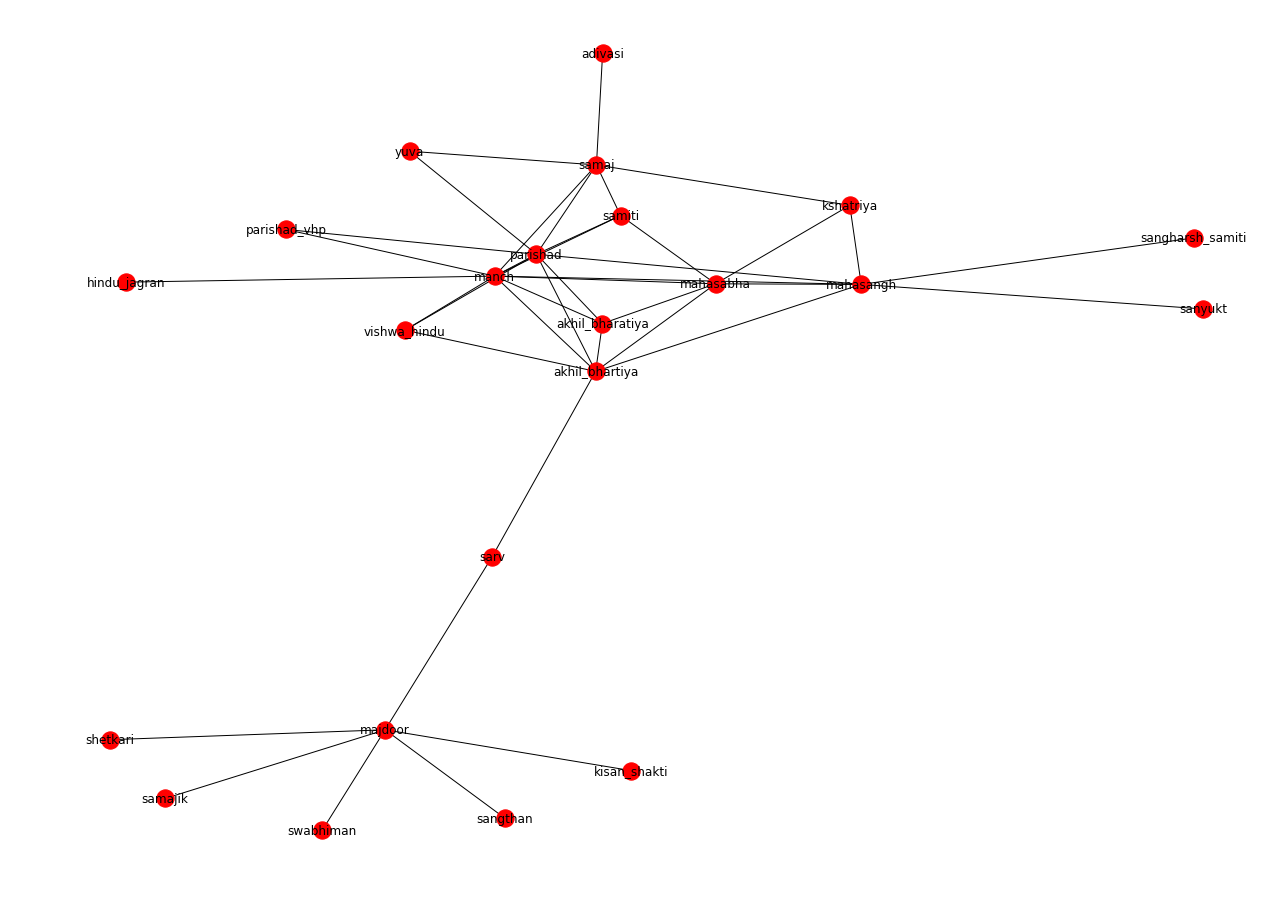

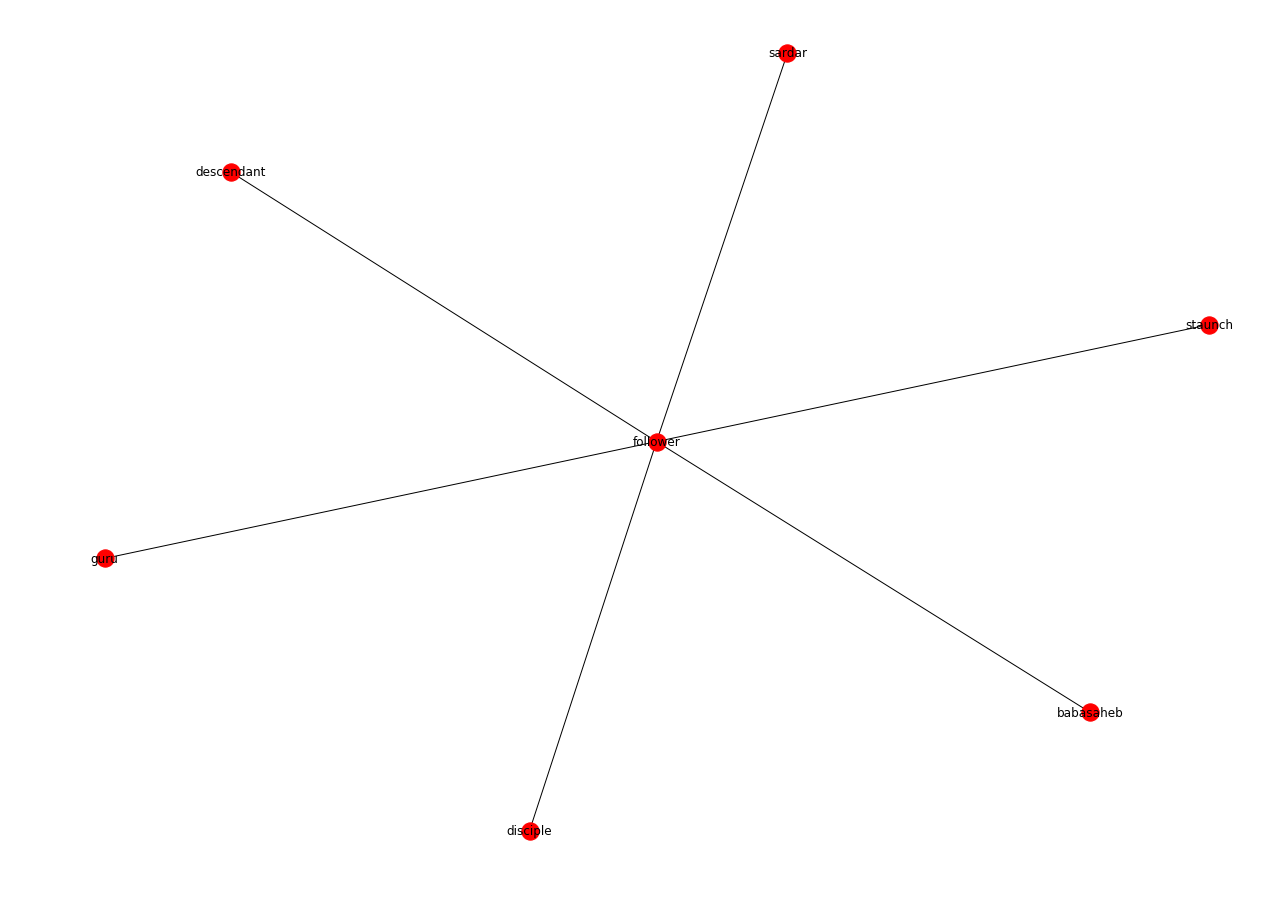

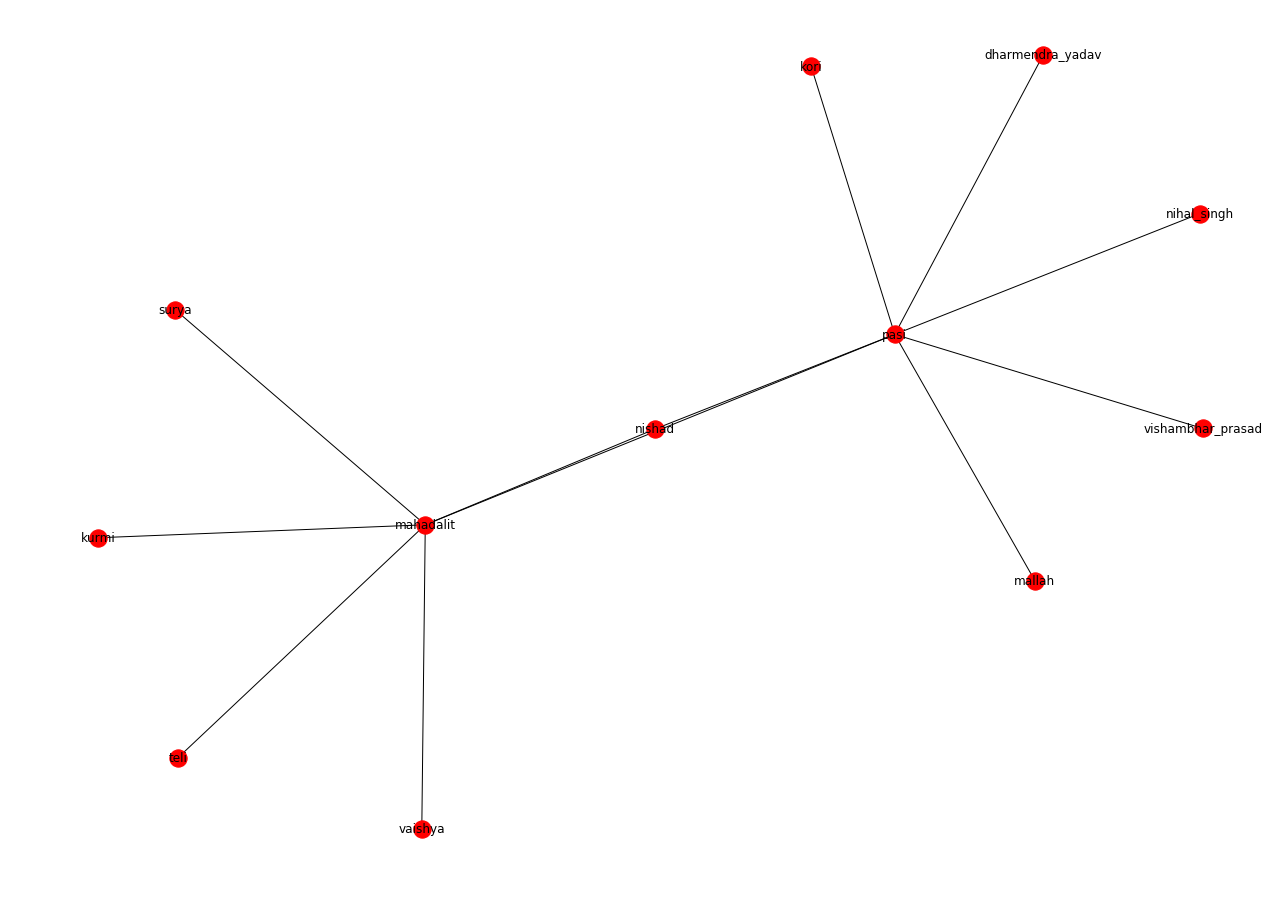

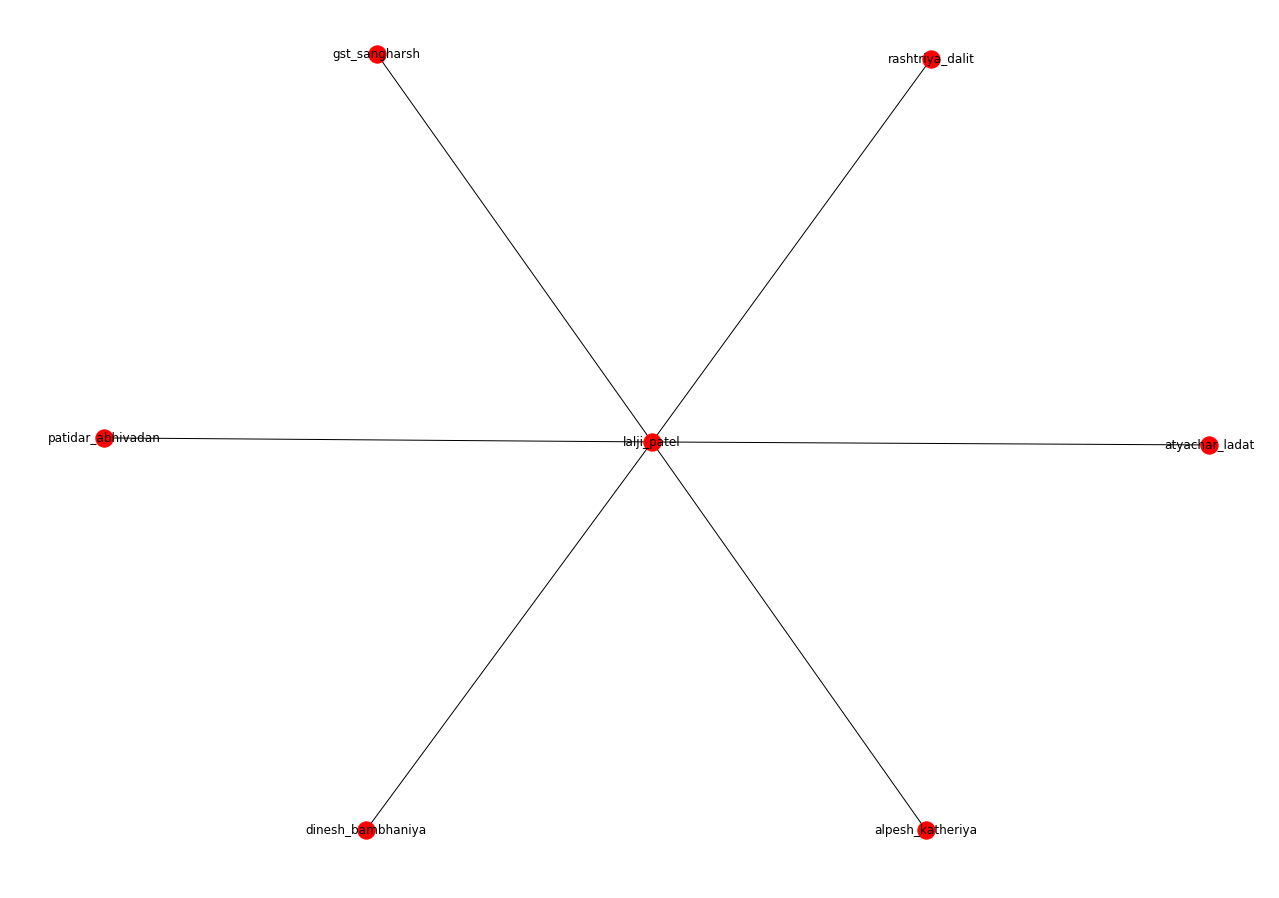

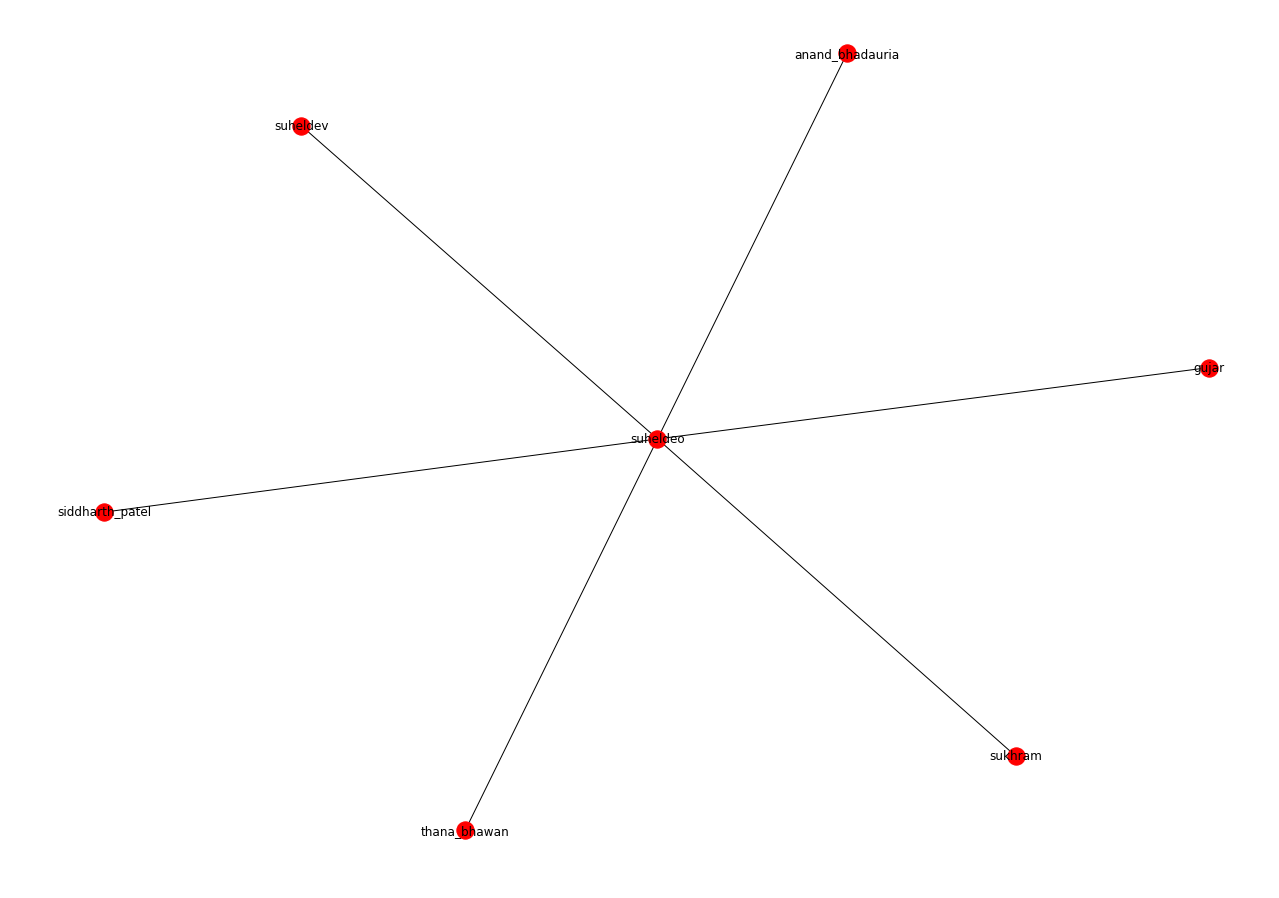

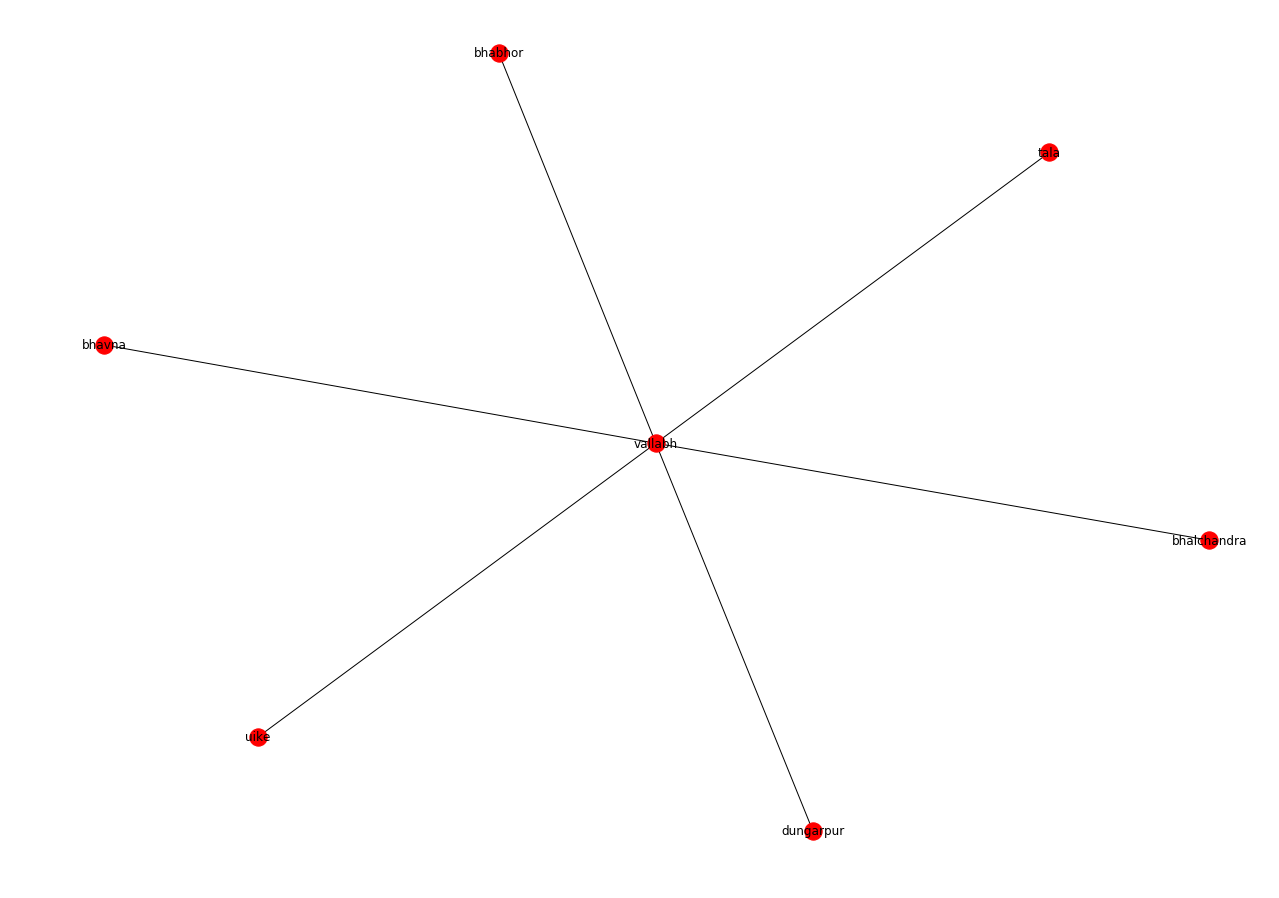

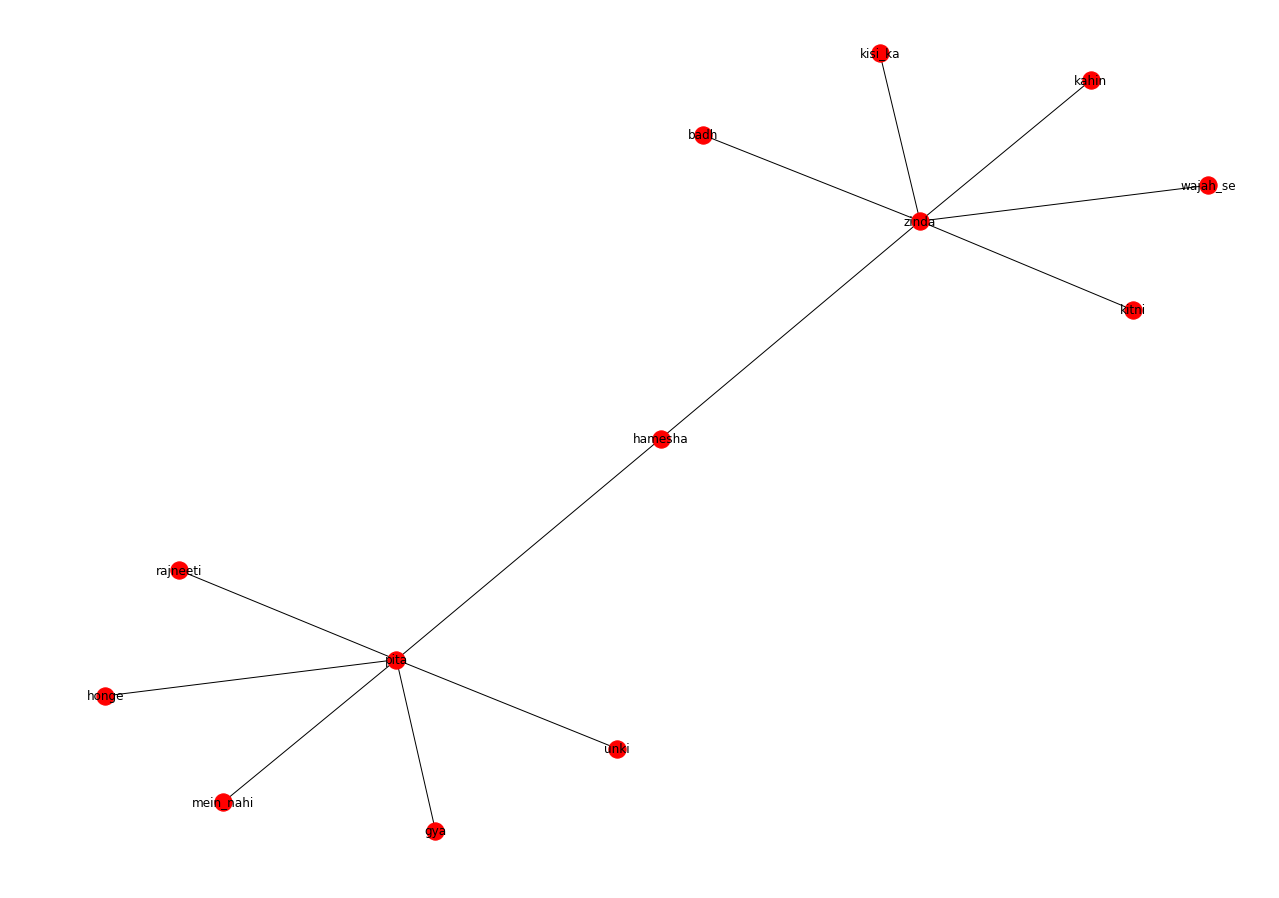

In [9]:
for gt1 in topics:
    nx.draw(gt1, with_labels=True)
    plt.show()

In [18]:
cliques4 = [x for x in nx.clique.find_cliques(g1) if len(x)==4]
nodes4 = set(n for clq in cliques4 for n in clq)
h4 = g1.subgraph(nodes4)

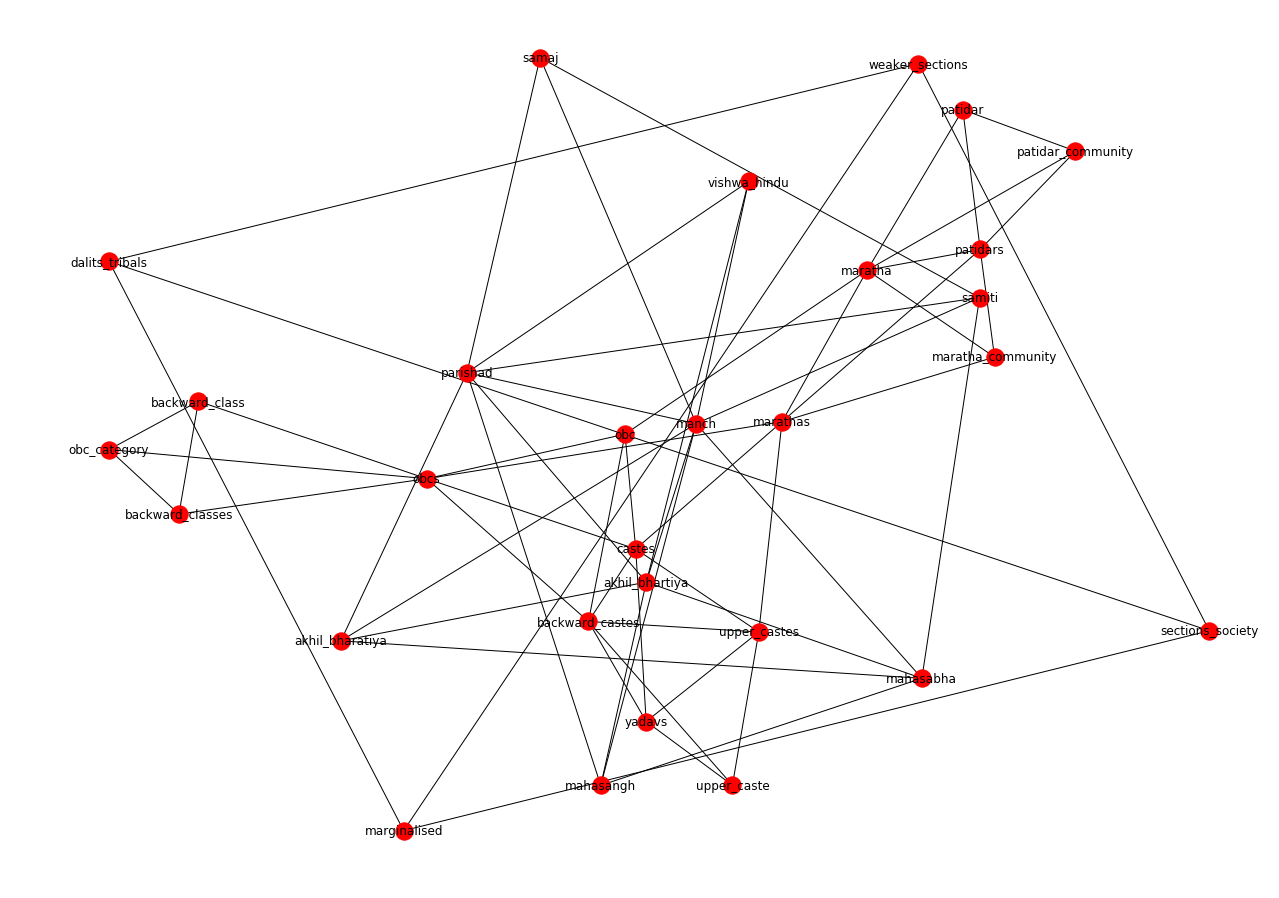

In [19]:
for conn_comp in nx.connected_component_subgraphs(h4):
    nx.draw(conn_comp, with_labels=True)

plt.show()

In [20]:
cliques3 = [x for x in nx.clique.find_cliques(g1) if len(x)==3]
nodes3 = set(n for clq in cliques3 for n in clq)
h3 = g1.subgraph(nodes3)
len(nodes3)

48

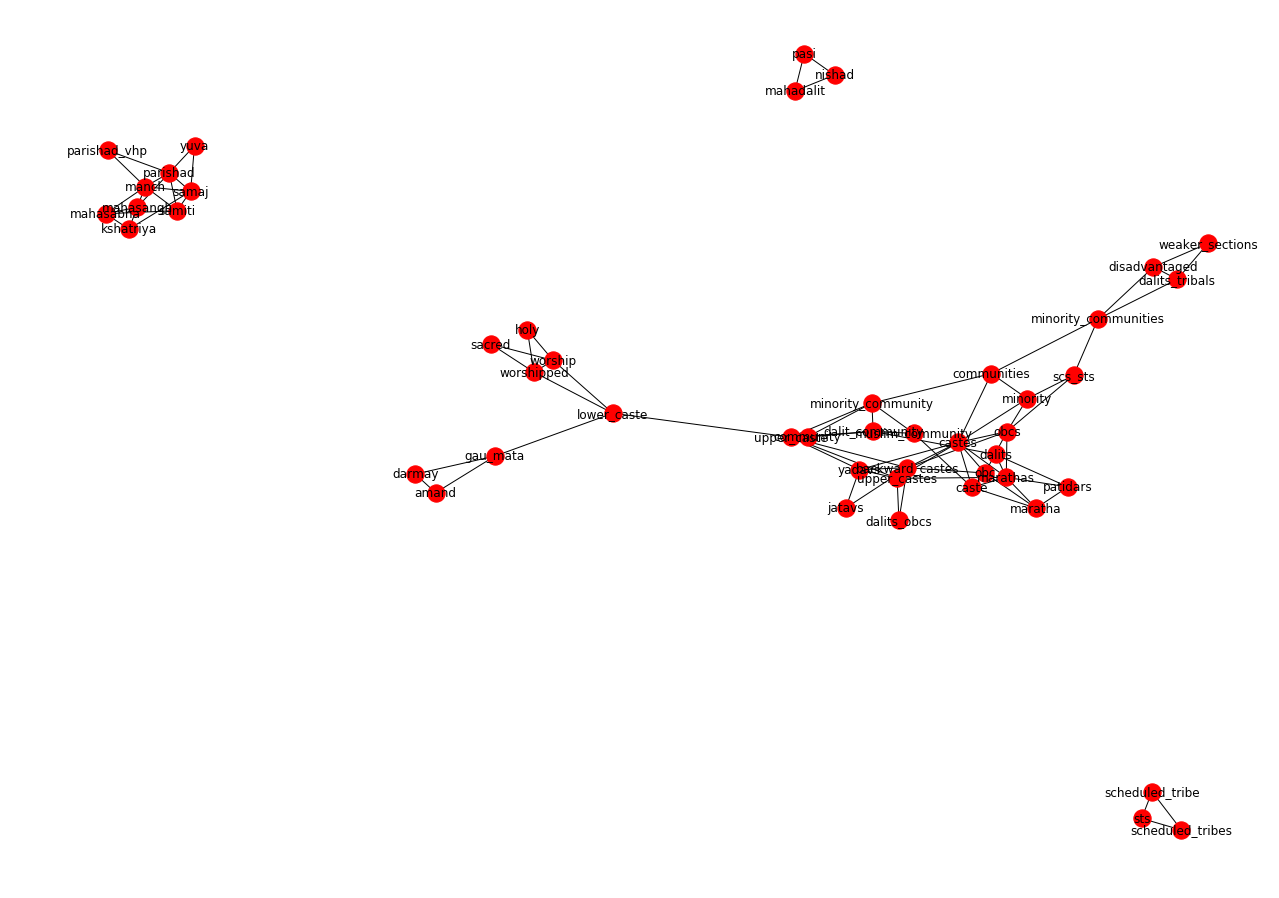

In [21]:
nx.draw(h3, with_labels=True)
plt.show()